# COGS 108 - Final Project 

# Overview

*Fill in your overview here*

# Names

- Susmitha Kalidindi 
- Alyssa Ashmore 
- Shardul Saiya 
- Siyi Wang


# Group Members IDs

- A13167684
- A12833150
- A13964199
- A53233349

# Research Question

- Question 1: Want to study how strong the correlation is between words used in product reviews with the ratings given for that product
- Question 2: Want to study the relationship between specific language that users use in reviews, the value of the  ratings they give and whether they are “fake” or incentivized reviews

Edit: Mapping the keywords in Amazon review text against the review ratings to see if words can be used to predict ratings.

## Background and Prior Work

Background:

References:
- 1) https://reviewmeta.com/
- 2) 

# Hypothesis


# Dataset(s)

Dataset Name: Consumer Reviews of Amazon Products
Link to the dataset: https://www.kaggle.com/datafiniti/consumer-reviews-of-amazon-products#Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv
Number of observations: 34,000 reviews

This dataset contains a list of over 34,000 reviews of Amazon products like the Kindle, Fire TV, including measures on the 

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

# Part 1 - Review prediction without NLP

# Setup

In [1]:
## Import Data from CSV file here, SEE Project proposal for link to csv file
import pandas as pd 

dfraw = pd.read_csv("../consumer-reviews-of-amazon-products/1429_1.csv", engine = 'python')

# Data Cleaning

Describe your data cleaning steps here.

In [2]:
# Get rid of most unwanted rows, only keep 
# Name, Category, Reviews.DoRecommend, Review.numHelpful, Reviews.ratings, Review.text, Review.title 

df1 = dfraw.drop(['asins', 'brand', 'keys', 'manufacturer', 'reviews.sourceURLs', 'reviews.userCity', 
                  'reviews.userProvince', 'reviews.username', 'reviews.dateAdded', 'reviews.dateSeen', 
                  'reviews.didPurchase' , 'reviews.id', 'id' ], axis=1)

#get rid of rewiews without ratings
df1 = df1.dropna(subset=['reviews.rating', 'reviews.text', 'reviews.text'])

# Now df1 contains:
# name, categories, reviews.date, reviews.doRecommend,
# reviews.numHelpful, reviews.rating, reviews.text, reviews.title

In [3]:
#helper function to filter data
def filter_review(review):
    # Convert to string
    string = str(review)
    
    # Data Filtering
    string = string.replace('.', ' ')
    string = string.replace(',', ' ')
    string = string.replace('-', ' ')
    # string = string.replace('\'', ' ')
    string = string.replace('\"', ' ')
    string = string.replace('/', ' ')
    string = string.replace('(', ' ')
    string = string.replace(')', ' ')
    string = string.replace('!', ' ')
    string = string.replace('?', ' ')
    string = string.replace('=', ' ')
    string = string.replace('+', ' ')
    string = string.replace('-', ' ')
    string = string.replace('�', '')
    string = string.replace('☺️', ' ')
    string = string.replace('&', ' ')
    string = string.replace('$', ' ')
    string = string.replace('*', ' ')
    string = string.replace('%', ' ')

    
    return string

In [4]:
df1.head()

,name,categories,reviews.date,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,reviews.title
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",2017-01-13T00:00:00.000Z,True,0.0,5.0,This product so far has not disappointed. My c...,Kindle
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",2017-01-13T00:00:00.000Z,True,0.0,5.0,great for beginner or experienced person. Boug...,very fast
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",2017-01-13T00:00:00.000Z,True,0.0,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",2017-01-13T00:00:00.000Z,True,0.0,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",2017-01-12T00:00:00.000Z,True,0.0,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids


In [5]:
# dictionary to count all unique words in customer reviews
# contains word : frequency
words_dict = {}

# Helper function to count words in a string 
# This function directly modifies the words_dict declared above
def word_frequency_counter(review):
    
    string = filter_review(review)

    # Convert to lower case and split
    my_string = string.lower().split()
    for item in my_string:
        if item in words_dict:
            words_dict[item] += 1
        else:
            words_dict[item] = 1

In [6]:
# dictionary to count raw rating value of each word
rating_dict = {}

#Helper function to add up raw review values for each word and 
def rating_counter(review, rating):
    string = filter_review(review)
    rating = int(rating)
    
    # Convert to lower case and split
    my_string = string.lower().split()
    for item in my_string:
        if item in rating_dict:
            rating_dict[item] = rating_dict[item] + rating
        else:
            rating_dict[item] = rating
    

In [7]:
for review in df1['reviews.text']:
    word_frequency_counter(review)
for index, row in df1.iterrows():
    rating_counter(row['reviews.text'], row['reviews.rating'])

In [8]:
# TODO
# Visualize word frequency's for top words with a histogram or some other graph
sorted_words_list = list(sorted(words_dict.items(), key=lambda item: item[1], reverse=True))
words_list_20 = sorted_words_list[0:20] 
df_words = pd.DataFrame(words_list_20, columns=['word', 'frequency'])
df_words.plot(kind='bar', x='word')

In [9]:
# Now we have two dictionaries
# word_dict contains words associated with their frequency in all the ratings
# rating_dict_raw cotains words associated with their raw rating values, summed up


# Now we want to divide the values in rating_dict by the frequency values in word_dict
# Thats what this helper function does, and saves it in rating_dict
def ratings_avg(word_dict, rating_dict):
    for item in word_dict:
        if item in rating_dict:
            rating_dict[item] = rating_dict[item]/word_dict[item]
        else:
            print('This shouldnt happen !!')
    

In [10]:
ratings_avg(words_dict, rating_dict)


In [11]:
# TODO
# Visualize these average rating values with words


# Problem with this Approach 
simply counting how many times each word appears in every document
The problem with this method is that it doesn’t take into account the relative importance of words in the texts. 
A word that appears in almost every text would not likely bring useful information for analysis. 
On the contrary, rare words may have a lot more of meanings.

# Hence the motivation for Part 2...

### We add the TF-IDF (Term Frequency — Inverse Document Frequency) values for every word and every document.
The TF-IDF metric solves this problem:

- TF computes the classic number of times the word appears in the text
- IDF computes the relative importance of this word which depends on how many texts the word can be found

# PART 2
## Detecting Bad customer reviews with NLP

For each textual review, we want to predict if it corresponds to a good review (the customer is happy) or to a bad one (the customer is not satisfied). The reviews overall ratings can range from 0/5 to 5/5. 

We will split those into two categories:

bad reviews have overall ratings < 2.5
good reviews have overall ratings >= 2.5

Then we see if we are be able to predict this information using only the raw textual data from the review. Let’s get it started!

In [12]:
df2 = dfraw.drop(['asins', 'brand', 'keys', 'manufacturer', 'reviews.sourceURLs', 'reviews.userCity', 
                  'reviews.userProvince', 'reviews.username', 'reviews.dateAdded', 'reviews.dateSeen', 
                  'reviews.didPurchase' , 'reviews.id', 'id' ], axis=1)
reviews_df = df2.drop(['name','reviews.date', 'categories'], axis=1)

# create the label
reviews_df["is_bad_review"] = reviews_df["reviews.rating"].apply(lambda x: 1 if x <= 3 else 0)
# select only relevant columns
reviews_df = reviews_df[["reviews.text", "is_bad_review"]]


In [13]:
# This is what our data now looks like
reviews_df.head()

,reviews.text,is_bad_review
0,This product so far has not disappointed. My c...,0
1,great for beginner or experienced person. Boug...,0
2,Inexpensive tablet for him to use and learn on...,0
3,I've had my Fire HD 8 two weeks now and I love...,0
4,I bought this for my grand daughter when she c...,0


In [14]:
# Sample the data to speed up computation,
# uncomment is data is taking too long but shouldnt be necessary
reviews_df = reviews_df.sample(frac = 0.1, replace = False, random_state=42)


In [15]:
# return the wordnet object value corresponding to the POS tag
import nltk 
from nltk.corpus import wordnet
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package wordnet to /Users/ssaiya/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ssaiya/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# Data cleaning using nltk
### clean_text Does the following things:
- lower case the text
- tokenize the text 
- remove punctuation
- remove useless words that contain numbers
- remove useless stop words like ‘the’, ‘a’ ,’this’ etc.
- Part-Of-Speech (POS) tagging: assign a tag to every word to define if it corresponds to a noun, a verb etc. using the WordNet lexical database
- lemmatize the text: transform every word into their root form (e.g. rooms -> room, slept -> sleep)

In [16]:
def clean_text(text):
    
    # float/int etc to string
    text = str(text)
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [17]:
reviews_df["review_clean"] = reviews_df["reviews.text"].apply(lambda x: clean_text(x))
reviews_df.head()

,reviews.text,is_bad_review,review_clean
1763,I received this as a gift after my original Ki...,0,receive gift original kindle fire start give t...
20879,Bought this for easier reading and it meets my...,0,buy easy read meet expectation great display f...
26427,Alexa does all that was described. It is like ...,0,alexa describe like assistant selects music ma...
8344,I researched about tablets and based on my int...,0,research tablet base interest choose amazon fi...
34279,This is not our first Amazon Fire---we have th...,0,first amazon fire---we every tv house cord cut...


# Sentiment Analysis
We use Vader, which is a part of the NLTK module designed for sentiment analysis. 
Vader uses a lexicon of words to find which ones are positives or negatives. 
It also takes into account the context of the sentences to determine the sentiment scores. 
For each text, Vader returns 4 values:
- Negativity score (neg)
- Neutrality score (neu)
- Positivity score (pos)
- Overall score (compound)


In [18]:
# add sentiment anaylsis columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
reviews_df["sentiments"] = reviews_df["reviews.text"].apply(lambda x: sid.polarity_scores(x))
reviews_df = pd.concat([reviews_df.drop(['sentiments'], axis=1), reviews_df['sentiments'].apply(pd.Series)], axis=1)


Next, we find simple metrics for every text which we will use ahead :
- Number of characters in each review
- Number of words in each review

In [19]:
# add number of characters column
reviews_df["nb_chars"] = reviews_df["reviews.text"].apply(lambda x: len(x))

# add number of words column
reviews_df["nb_words"] = reviews_df["reviews.text"].apply(lambda x: len(x.split(" ")))

In [20]:
reviews_df.head()

,reviews.text,is_bad_review,review_clean,neg,neu,pos,compound,nb_chars,nb_words
1763,I received this as a gift after my original Ki...,0,receive gift original kindle fire start give t...,0.093,0.645,0.262,0.9498,474,89
20879,Bought this for easier reading and it meets my...,0,buy easy read meet expectation great display f...,0.000,0.615,0.385,0.7845,84,13
26427,Alexa does all that was described. It is like ...,0,alexa describe like assistant selects music ma...,0.000,0.844,0.156,0.5848,161,30
8344,I researched about tablets and based on my int...,0,research tablet base interest choose amazon fi...,0.104,0.736,0.160,0.0772,136,24
34279,This is not our first Amazon Fire---we have th...,0,first amazon fire---we every tv house cord cut...,0.049,0.815,0.135,0.8055,317,57


The next step consist in extracting vector representations for every review. 
The module Gensim creates a numerical vector representation of every word in the corpus by using the contexts in which they appear (Word2Vec). 
This is performed using shallow neural networks. What’s interesting is that similar words will have similar representation vectors

In [21]:
# create doc2vec vector columns
import gensim
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(reviews_df["review_clean"].apply(lambda x: x.split(" ")))]

# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

# transform each document into a vector data
doc2vec_df = reviews_df["review_clean"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
reviews_df = pd.concat([reviews_df, doc2vec_df], axis=1)

We first have to train a Doc2Vec model by feeding in our text data. By applying this model on our reviews, we can get those representation vectors.

We add TF-IDF columns for every word that appear in at least 10 different texts to filter some of them and reduce the size of the final output

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 10)
tfidf_result = tfidf.fit_transform(reviews_df["review_clean"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = reviews_df.index
reviews_df = pd.concat([reviews_df, tfidf_df], axis=1)

# Exploratory Data Analysis

In [23]:
reviews_df["is_bad_review"].value_counts(normalize = True)

0    0.937969
1    0.062031
Name: is_bad_review, dtype: float64

So as you may have noticed, about 6 percent of our reviews are considered negative ones.

# WordCloud of data after filtering and cleaning

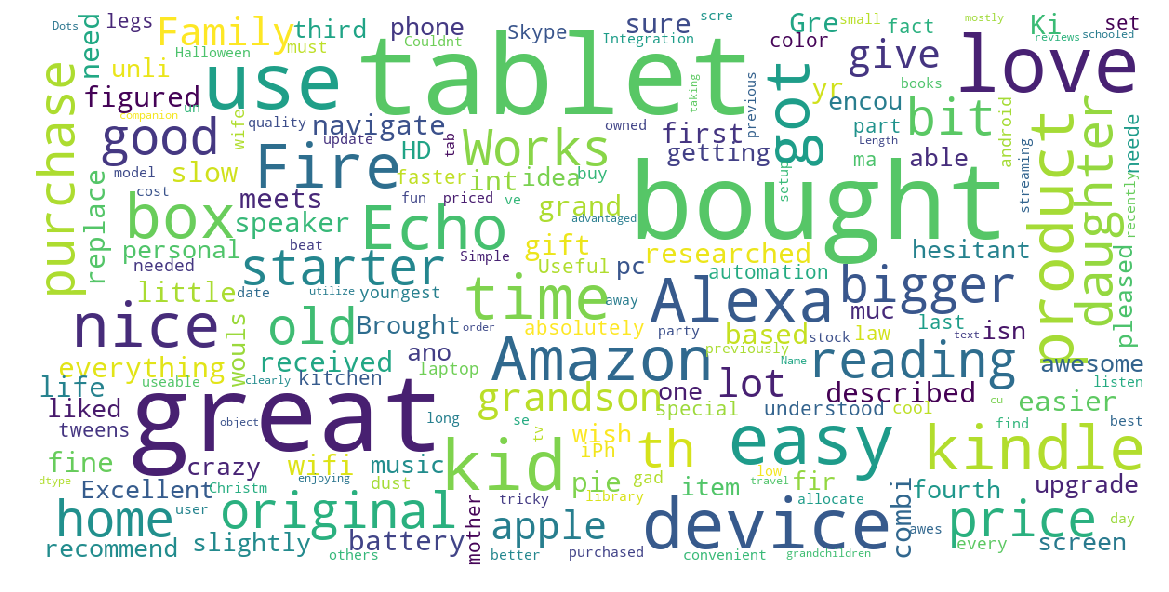

In [24]:
# wordcloud function

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(reviews_df["reviews.text"])

# Most Positive reviews

In [25]:
# highest positive sentiment reviews (with more than 5 words)
reviews_df[reviews_df["nb_words"] >= 5].sort_values("pos", ascending = False)[["reviews.text", "pos"]].head(10)

,reviews.text,pos
11909,Great great great great great great great grea...,0.970
13701,Excellent Product & Highly recommended. Excell...,0.830
11551,Awesome tablet. Performance great. Perfect buy...,0.813
34060,"I love it, pretty fast!!! Good resolution, nic...",0.777
20572,I love it. Will definitely recommend it to a f...,0.759
10779,Great battery life and easy to navigate!!! Gre...,0.746
8387,"Great Device! Quick, easy to use and a great v...",0.738
4471,easy to use. looks good. The prize winner was ...,0.728
32343,Easy to install and use. Easy set-up. Great fo...,0.719
32908,good product for a best price! highly recommen...,0.716


# Most Negative reviews

In [26]:
# lowest negative sentiment reviews (with more than 5 words)
reviews_df[reviews_df["nb_words"] >= 5].sort_values("neg", ascending = False)[["reviews.text", "neg"]].head(10)

,reviews.text,neg
6633,Bad graphics. Ugly design. Good for the price....,0.485
33755,"Not user friendly. Sluggish, confusing, and ex...",0.455
10241,So far no problems except no kid friendly case...,0.437
30397,My old fire stick had just died. So I upgraded...,0.431
32521,"I was tired of the insane cable bills, so I bo...",0.421
9489,"Perfect size reader, no fuss, websurfing, vide...",0.399
29017,"hard to use, and does not support Guam. online...",0.394
3852,No bad for the price. The bad is the got too m...,0.365
19402,No glare anywhere--even on the beach! Also you...,0.362
8612,Good phone but my return visit the customer se...,0.358


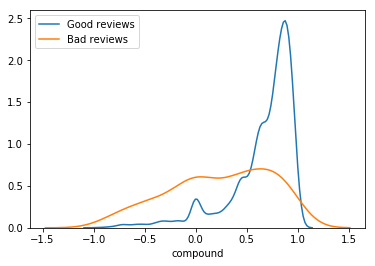

In [27]:
# plot sentiment distribution for positive and negative reviews

import seaborn as sns

for x in [0, 1]:
    subset = reviews_df[reviews_df['is_bad_review'] == x]
    
    # Draw the density plot
    if x == 0:
        label = "Good reviews"
    else:
        label = "Bad reviews"
    sns.distplot(subset['compound'], hist = False, label = label)

# Predicting is_bad_review


We first choose which features we want to use to train our model

In [28]:
# feature selection
label = "is_bad_review"
ignore_cols = [label, "reviews.text", "review_clean"]
features = [c for c in reviews_df.columns if c not in ignore_cols]

Split our data into two parts:
- one to train our model
- one to test its performances

In [29]:
# split the data into train and test
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(reviews_df[features], 
                                        reviews_df[label], test_size = 0.20, random_state = 42)

Now we will train the random forest classifier

In [35]:
# train a random forest classifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

# Most Important Features 

In [34]:
# show feature importance
feature_importances_df = pd.DataFrame({"feature": features, "importance": rf.feature_importances_}).sort_values("importance", ascending = False)
feature_importances_df.head(20)

,feature,importance
3,compound,0.041377
2,pos,0.035197
1,neu,0.024470
9,doc2vec_vector_3,0.018751
4,nb_chars,0.017350
542,word_return,0.017241
0,neg,0.017101
7,doc2vec_vector_1,0.016796
8,doc2vec_vector_2,0.016760
10,doc2vec_vector_4,0.016557


The most important features are indeed the ones that come from the previous sentiment analysis. 
ie - compound, pos, neu an
The vector representations of the texts also have a lot of importance in our training. Some words appear to have a fairly good importance as well.

# Data Analysis & Results

Include cells that describe the steps in your data analysis.

In [31]:
# Now rating_dict has what we need to go ahead


# Ethics & Privacy

*Fill in your ethics & privacy discussion here*

# Conclusion & Discussion

*Fill in your discussion information here*